# IGTI - Bootcamp Analista de Machine Learning

    Autor: Leonardo Simões

## Desafio Final

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [119]:
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [120]:
#Carregando os dados do .csv em um dataframe
df = pd.read_csv("cars.csv")
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


## Pergunta 1
Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:

(X) Não foram encontrados valores nulos após a leitura dos dados.

( ) Os valores nulos encontrados estão presentes apenas no variável “cubicinches”.

( ) Existem apenas duas características do tipo “string”.

( ) Os valores nulos estão presentes apenas para a saída dos dados.

In [121]:
#Valores nulos em cada coluna
df.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [123]:
#Colunas do tipo string
type(df['weightlbs'][0]), type(df['cubicinches'][0]), type(df['brand'][0])

(str, str, str)

## Pergunta 2

Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro errors='coerce'. Após essa transformação é CORRETO afirmar:

( ) Essa transformação deve ser realizada apenas para valores nulos.

( ) Após essa transformação não ocorreu a introdução de valores nulos.

( ) Após a transformação não ocorre mudanças no tipo de variáveis.

(X) Essa transformação adiciona valores nulos ao nosso dataset.

In [124]:
#Convertendo coluna de string para numeric
df["cubicinches"] = pd.to_numeric(df["cubicinches"], errors='coerce')

In [125]:
#Convertendo coluna de string para numeric
df["weightlbs"] = pd.to_numeric(df["cubicinches"], errors='coerce')

In [126]:
df[["cubicinches", "weightlbs"]].isna().sum()

cubicinches    2
weightlbs      2
dtype: int64

In [127]:
df[["cubicinches", "weightlbs"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cubicinches  259 non-null    float64
 1   weightlbs    259 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


## Pergunta 3
Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

In [128]:
#Verificando linhas (indices) com valores nulos
df[["cubicinches", "weightlbs"]].query('cubicinches.isnull() | weightlbs.isnull()', engine='python')

,cubicinches,weightlbs
40,NaN,NaN
180,NaN,NaN


## Pergunta 4
Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset? 

In [129]:
df[["cubicinches", "weightlbs"]].isna().sum()

cubicinches    2
weightlbs      2
dtype: int64

## Pergunta 5
Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. 

Qual é o novo valor médio da coluna “weightlbs”? 

In [130]:
df[["cubicinches", "weightlbs"]].mean()

cubicinches    200.918919
weightlbs      200.918919
dtype: float64

In [131]:
df["weightlbs"].fillna(df["weightlbs"].mean(), inplace = True)

In [132]:
df["cubicinches"].fillna(df["cubicinches"].mean(), inplace = True)

In [133]:
df[["cubicinches", "weightlbs"]].isna().sum()

cubicinches    0
weightlbs      0
dtype: int64

In [134]:
df["weightlbs"].describe()

count    261.000000
mean     200.918919
std      108.837269
min       68.000000
25%      101.000000
50%      156.000000
75%      302.000000
max      455.000000
Name: weightlbs, dtype: float64

In [135]:
df["weightlbs"].mean()

200.91891891891893

In [136]:
df.mean()

mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs       200.918919
time-to-60       15.547893
year           1976.819923
dtype: float64

## Pergunta 6
Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'? 

In [137]:
df = df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]

In [138]:
df['mpg'].median()

22.0

## Pergunta 7
Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”? 

In [139]:
df['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

## Pergunta 8
Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:

In [140]:
pearsonr(df["cylinders"],df["mpg"])

(-0.7767098829880008, 6.418952616907506e-54)

In [141]:
df[['cylinders', 'mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


## Pergunta 9
Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO: 

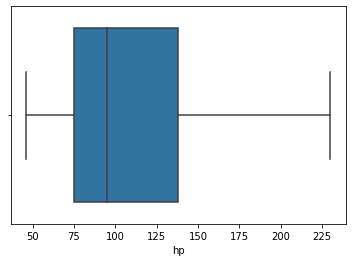

In [142]:
sbn.boxplot(x=df['hp']);

In [143]:
df['hp'].describe()

count    261.000000
mean     106.360153
std       40.499959
min       46.000000
25%       75.000000
50%       95.000000
75%      138.000000
max      230.000000
Name: hp, dtype: float64

## Pergunta 10
Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável "hp"? 

In [144]:
#X =  df.drop('brand', axis=1)

In [145]:
#y = df['brand'].astype('category').cat.codes

In [146]:
#y.value_counts()

In [147]:
#df['brand'].value_counts()

In [148]:
X = df

In [149]:
normaliza = StandardScaler()

In [150]:
normaliza.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [151]:
X_norm = normaliza.transform(X)
X_norm

array([[-1.17112732,  1.39305285,  1.37239295, ...,  1.37239295,
        -1.22128734, -1.32753906],
       [ 1.12122635, -0.91910482, -1.03028992, ..., -1.03028992,
        -0.53282946,  0.8758803 ],
       [-0.78693397,  1.39305285,  0.93052024, ...,  0.93052024,
        -1.56551627, -1.60296648],
       ...,
       [-0.14661172,  0.23697401,  0.28612253, ...,  0.28612253,
        -0.18860053,  1.70216257],
       [-0.65886952,  0.23697401,  0.28612253, ...,  0.28612253,
         0.15562841, -1.32753906],
       [-0.14661172,  0.23697401,  0.4518248 , ...,  0.4518248 ,
        -0.18860053,  0.04959804]])

In [152]:
for i in range(7):
    print(X_norm[:,i].max())

3.0037737725025613
1.393052850675895
2.3389895000568943
3.05870398977614
2.3389895000568943
3.253688833905298
1.7021625663165387


In [153]:
X_norm[:,3].max()

3.05870398977614

In [154]:
df['hp'].max()

230

In [155]:
#Tentativa 2

In [156]:
normaliza2 = StandardScaler()
normaliza2.fit(df['hp'].values.reshape(-1, 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [158]:
hp_norm = normaliza2.transform(df['hp'].values.reshape(-1, 1))

In [159]:
hp_norm.max()

3.05870398977614

## Pergunta 11

Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?

( )34% ( )13% (X)72% ( )92%

In [160]:
pca = PCA(n_components=7)

In [161]:
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [162]:
pca.explained_variance_ratio_

array([7.38622567e-01, 1.25083952e-01, 8.34092897e-02, 2.93611851e-02,
       1.64351949e-02, 7.08781068e-03, 6.45272604e-34])

## Pergunta 12

Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar:

( ) Existem 3 centroides após a aplicação da clusterização.

( ) Todos os clusters possuem a mesma quantidade de elementos.

( ) Os centroides, utilizando apenas as 3 componentes principais, possuem 3 dimensões.

( ) Cada um dos clusters possui características próprias.

In [163]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [164]:
principalComponents = pca.transform(X_norm)
PCA_components = pd.DataFrame(principalComponents)

In [165]:
PCA_components.iloc[:, :3]

,0,1,2
0,3.470060,0.525105,-0.206326
1,-2.068451,-0.477053,-1.199185
2,2.858371,0.882862,-0.686237
3,3.936602,0.585786,-0.625939
4,-2.221807,0.126465,-0.190987
...,...,...,...
256,1.804103,-1.284513,0.648731
257,-2.533218,-0.281811,-0.686965
258,0.147506,-1.694761,0.056592
259,0.765817,1.250701,0.459638


In [166]:
kmeans.fit(PCA_components.iloc[:, :3])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Pergunta 13
Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. 

Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. 

Utilize as colunas ['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada. Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [167]:
df['eficiente'] = 0

In [168]:
df.loc[df['mpg']>25, 'eficiente'] = 1

In [169]:
df['eficiente'].value_counts()

0    162
1     99
Name: eficiente, dtype: int64

In [170]:
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,eficiente
0,14.0,8,350.0,165,350.0,12,1972,0
1,31.9,4,89.0,71,89.0,14,1980,1
2,17.0,8,302.0,140,302.0,11,1971,0
3,15.0,8,400.0,150,400.0,10,1971,0
4,30.5,4,98.0,63,98.0,17,1978,1
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,305.0,15,1980,0
257,36.1,4,91.0,60,91.0,16,1979,1
258,22.0,6,232.0,112,232.0,15,1983,0
259,18.0,6,232.0,100,232.0,16,1972,0


In [171]:
X, y = df[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']], df['eficiente']

In [172]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.30, random_state=42)

In [173]:
dtc = DecisionTreeClassifier(random_state=42)

In [174]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [175]:
y_pred = dtc.predict(X_test)

In [177]:
accuracy_score(y_test, y_pred)

0.8354430379746836

## Pergunta 14
Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

In [179]:
confusion_matrix(y_test, y_pred)

array([[39,  2],
       [11, 27]], dtype=int64)

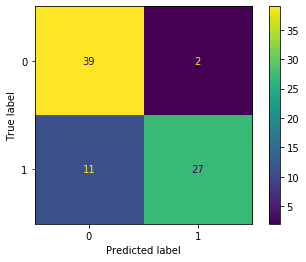

In [180]:
plot_confusion_matrix(dtc , X_test, y_test,
                      #display_labels=class_names,
                      #cmap=plt.cm.Blues,
                      #normalize=normalize)
                     );

## Pergunta 15
Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho. Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar: 

In [182]:
lr = LogisticRegression(random_state=42)

In [183]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
y_pred2 = lr.predict(X_test)

In [185]:
accuracy_score(y_test, y_pred2)

0.8734177215189873

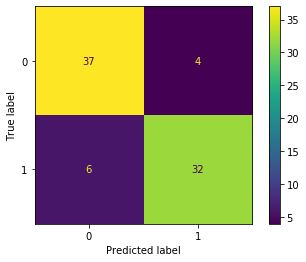

In [186]:
plot_confusion_matrix(lr , X_test, y_test);